# Image Compressing using K means Clustering 


## Why we need image compression
 - Reducing file size: Image compression helps to reduce the file size of an image, making it easier to share and transfer over the internet. This is especially important for websites, where large image files can slow down page loading times.

- Saving storage space: Compressing images also helps to save storage space on devices, such as phones and computers. This is particularly useful for users who have limited storage capacity.

- Enhancing image quality: Image compression algorithms can be used to enhance the quality of an image by reducing noise and smoothing out any rough edges.

- Improving loading speed: Compressed images load faster than uncompressed images, which can improve the user experience on websites and apps.

- Reducing data usage: Compressing images can also help to reduce data usage, which can be beneficial for users with limited data plans.

- Better visual representation: Compressing images can help in better visual representation of data, which can be useful for infographics and charts.

## K Means Clustering 
K-means clustering is an iterative algorithm that starts by randomly selecting k initial centroids, where k is the number of clusters specified by the user. Each data point is then assigned to the cluster whose centroid it is closest to, based on the distance metric used (e.g. Euclidean distance).

## K-Means Clustering with Image compression 
K-means clustering can also be used in image compression by grouping similar pixels together and representing them with a single color. This process is known as color quantization and can be used to reduce the number of colors in an image while maintaining its overall appearance.

The algorithm starts by dividing the image into k number of clusters, where k is a user-specified parameter. Each pixel in the image is then assigned to the cluster that it is closest to based on its color values. The mean color of each cluster is then calculated and used to represent all the pixels in that cluster.

This process results in a reduction of the number of colors in the image, which in turn reduces the file size. The compressed image will have fewer colors than the original image, but it will still look similar to the original image.

In summary, K-means clustering can be used in image compression by grouping similar pixels together and representing them with a single color, which helps to reduce the number of colors in an image and the file size.

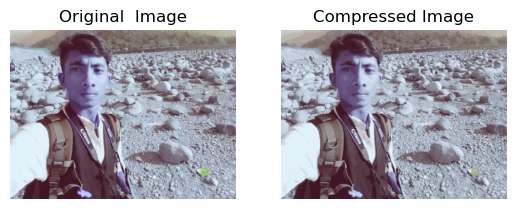

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

from skimage import io
#import mahotas as mh
import cv2

original_img = np.array(cv2.imread('./data/we.jpg'), dtype=np.float64) / 255
# img = cv2.imread('IMG_0559-01.jpeg')
#print(original_img)
zoriginal_img = original_img[:,:,::-1]

original_dimensions = tuple(original_img.shape)
width, height, depth = tuple(original_img.shape)
image_flattened = np.reshape(original_img, (width * height, depth))

image_array_sample = shuffle(image_flattened, random_state=0)[:1000]
estimator = KMeans(n_clusters=64, random_state=0)
estimator.fit(image_array_sample)
cluster_assignments = estimator.predict(image_flattened)

compressed_palette = estimator.cluster_centers_
compressed_img = np.zeros((width, height, compressed_palette.
shape[1]))
label_idx = 0
for i in range(width):
    for j in range(height):
        compressed_img[i][j] = compressed_palette[cluster_assignments[label_idx]]
        label_idx += 1


plt.subplot(122)
plt.title('Compressed Image')
plt.imshow(compressed_img)
plt.axis('off')
plt.subplot(121)
plt.title('Original  Image')
plt.imshow(original_img)
plt.axis('off')
plt.show()

In [6]:
print(original_img.size)
print(f"Compressd Image : {compressed_img.size}")

2359296
Compressd Image : 2359296


## Working Procedure

The working procedure for K-means clustering with image compression is as follows:

- Convert the image to a 2-dimensional array of pixels, where each pixel is represented by its RGB (red, green, blue) values.

- Initialize k centroids, where k is the number of clusters specified by the user. These centroids are chosen randomly from the set of all pixels in the image.

- Assign each pixel in the image to the cluster whose centroid it is closest to, based on the Euclidean distance between their RGB values.

- Recalculate the centroid of each cluster as the mean of all the pixels in that cluster.

- Repeat steps 3 and 4 until the centroids no longer change or a maximum number of iterations is reached.

- Once the clustering is complete, the compressed image is created by replacing each pixel in the original image with the centroid of the cluster it belongs to. This results in a reduction of the number of colors in the image, which in turn reduces the file size.

- The compressed image will have fewer colors than the original image, but it will still look similar to the original image.

In summary, the K-means clustering algorithm is used to group similar pixels together by assigning them to clusters and then represent them with a single color which helps to reduce the number of colors in an image and the file size.



